<a href="https://colab.research.google.com/github/CaseyAnnHorvath/desihigh/blob/main/two_body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
import sys
sys.path.append('/content/drive/MyDrive/desihigh/')

In [301]:
import time
import astropy
import itertools
import matplotlib

import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.units     as u

from   astropy.cosmology import FlatLambdaCDM
from   IPython.display   import YouTubeVideo
from   tools.flops       import flops

In [302]:
from IPython.display import clear_output
from time import sleep

In [303]:
%matplotlib inline

plt.style.use('dark_background')

In [304]:
def init_dof(npt=1):
  #  Create a set of particles at random positions in a box, which will soon predict the distribution of dark matter 
  #  as we see above.
  xs     = np.random.uniform(0., 1., npt)
  ys     = np.random.uniform(0., 1., npt)
  zs     = np.random.uniform(0., 1., npt)

  pos    = np.vstack((xs,ys,zs)).T
  vel    = np.zeros_like(pos)

  return  pos, vel

In [305]:
npt = 2
pos, vel  = init_dof(npt=npt)
mass=np.zeros_like(pos)


In [306]:
i = 0
pos[i][0]=0
pos[i][1]=0
pos[i][2]=0
pos[0]

i = 1
pos[i][0]=1.5e12
pos[i][1]=0
pos[i][2]=0



# vel of particle 1
i=0

vel[i][0]=0
vel[i][1]=11000
vel[i][2]=0

i=1

vel[i][1]=0
vel[i][1]=-5500
vel[i][2]=0



mass[0]=1.5e30
mass[1]=6e30

In [307]:
def com(pos,mass):  #defining CoM function, 
  result=np.dot(mass*pos)/np.sum(mass)
  return result

In [308]:
#Rcom=com(pos,mass)

In [309]:
#print, Rcom

In [310]:
#pos_com=pos-Rcom
#print, pos_com

In [311]:
#defining original values for the 2 bodies

m1=3e30
m2=6e30

v1=0.2e4
v2=-0.5e3

r1=0
r2=1e12

#distance between m1 and m2
r=r2-r1


In [312]:
def com_vel(vel,mass):
  result=np.sum(mass*vel,axis=0)/np.sum(mass)
  return result

#Simple 2body version

def findCoM(m1, r1, v1, m2, r2, v2):
  return (m1*r1 + m2*r2)/(m1+m2), (m1*v1 + m2*v2)/(m1+m2)

In [313]:
#dont need anymore
#print(findCoM(m1, r1, v1, m2, r2, v2)) #1.5e30, 0, 11000, 6e30, 1.5e12, -5500
#print, com_vel(vel,mass)

In [314]:
com_pos, com_vel = findCoM(m1, r1, v1, m2, r2, v2)
print(com_pos, com_vel)

666666666666.6666 333.33333333333337


In [315]:
#setting com reference frome to 0 vel

v1=v1-com_vel
v2=v2-com_vel

print(v1,v2)

1666.6666666666665 -833.3333333333334


In [316]:
#Gravitational Constant
G=6.67e-11

In [317]:
#energy calculation


def energy(m1,v1,m2,v2,r):
  return .5*m1*(v1**2)+.5*m2*(v2**2)-((G*m1*m2)/r)
  

In [318]:
E=energy(m1,v1,m2,v2,r)
print(E)

-1.19435e+39


In [319]:
#angular momentum calculation
def ang_momentum(m1,m2,v1,v2,r1,r2):
  return m1*v1*r1+m2*v2*r2

In [320]:
L=ang_momentum(m1,m2,v1,v2,r1,r2)
print(L)

-5e+45


In [321]:
#calc reduced mass
def reduced_mass(m1,m2):
  return (m1*m2)/(m1+m2)
  

In [322]:
u=reduced_mass(m1,m2)
print(u)

2e+30


In [323]:
#calc total mass
def tot_mass(m1,m2):
  return m1+m2

In [324]:
M=tot_mass(m1,m2)
print(M)

8.999999999999999e+30


In [325]:
#calc eccentricity
def eccentricity(L,E,u,M):
  return (1+(2*(L**2)*E)/((u**3)*(G**2)*(M**2)))**(1/2)

In [326]:
e=eccentricity(L,E,u,M)
print(e)

0.9895885390638014


In [327]:
#calc semi major axis
def sem_maj(M,u,E):
  return (G*M*u)/(2*E)
  

In [328]:
a=sem_maj(M,u,E)
print(a)

-502616485954.7033


In [329]:
#calculating distance for perhelion (maybe dont need)
def perihelion_rad(a,e):
  return a*(1-e)

r_peri=perihelion_rad(a,e)
print(r_peri)

-5232971909.406807


In [330]:
#calculating distance for aphelion (maybe dont need)
def aphelion_rad(a,e):
  return a*(1+e)

r_ap=aphelion_rad(a,e)
print(r_ap)

-999999999999.9999


In [331]:
#calc location of m1 and m2 (maybe dont need)


In [332]:
#calc theta-theta knot 

def theta(L,u,M,r,e,G):
  arg=((L**2)/(G*M*(u**2)*r*e))-(1.0/e)
  
  return np.arccos(np.around(arg,4))


In [333]:
theta=theta(L,u,M,r,e,G)
print(theta)

3.141592653589793


In [334]:
def rho_(L,u,M,r,e,G,theta,d_theta):
  return ((L**2)/(G*M*(u**2)*(1.0+e*np.cos(d_theta+theta))))

In [335]:
rho= rho_(L,u,M,r,e,G,theta,0)
print(rho)



999999999999.9967


In [336]:
def rho_x(rho, theta,d_theta):
  return rho*np.cos(d_theta+theta)

In [337]:
rho_x= rho_x(rho, theta,0)
print(rho_x)

-999999999999.9967


In [338]:
def rho_y(rho, theta,d_theta):
  return rho*np.sin(d_theta+theta)

In [339]:
rho_y= rho_y(rho, theta,0)
print(rho_y)

0.00012246467991473492


In [340]:
def r_1(u,m1,rho, theta):
  r1=(-u/m1)*rho
  r1_x=(-u/m1)*rho*np.cos(theta)
  r1_y=(-u/m1)*rho*np.sin(theta)
  return r1, r1_x, r1_y

In [341]:
r1, r1_x, r1_y=r_1(u,m1,rho,theta)
print(r1, r1_x, r1_y)

-666666666666.6646 666666666666.6646 -8.164311994315662e-05


In [342]:
def r_2(u,m2,rho, theta):
  r2=(u/m2)*rho
  r2_x=(u/m2)*rho*np.cos(theta)
  r2_y=(u/m2)*rho*np.sin(theta)
  return r2, r2_x, r2_y

In [343]:
r2, r2_x, r2_y=r_2(u,m2,rho,theta)
print(r2, r2_x, r2_y)

333333333333.3323 -333333333333.3323 4.082155997157831e-05


In [344]:
from matplotlib import animation, rc

rc('animation', html='jshtml')

In [345]:
dt         = 365*24*3600/60.0
nsteps     = 400
rho1=rho_(L,u,M,r,e,G,theta,0)
timesteps  = np.linspace(0, (nsteps)*dt, nsteps, endpoint=False)
x1=[]
x2=[]
y1=[]
y2=[]
for index_in_timestep, time in enumerate(timesteps):
       dtheta = L/u/rho**2*dt
       theta += dtheta
       rho1=rho_(L,u,M,r,e,G,theta,0)
       R1, r1_x, r1_y=r_1(u,m1,rho1,theta)
       R2, r2_x, r2_y=r_2(u,m2,rho1,theta)
       x1.append(r1_x)
       y1.append(r1_y)
       x2.append(r2_x)
       y2.append(r2_y)



In [346]:
r1=np.array([x1,y1])
r2=np.array([x2,y2])
np.shape(r2)

(2, 200)

In [347]:
AU=1.4959787E11 

In [348]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,title, and axes
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(r1[0, :num+1], r1[1, :num+1], c='blue')

    # Updating Point Location 
    ax.scatter(r1[0, num], r1[1, num], 
               c='blue', marker='o')
       # title, and axes
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(r2[0,:num+1], r2[1, :num+1], c='red')
    # Updating Point Location 
    ax.scatter(r2[0, num], r2[1, num], 
               c='red', marker='o')   # title, and axes
    
    # Setting Axes Limits
    ax.set_xlim([-1.5E12, 1.5E12])
    ax.set_ylim([-1.5E12, 1.5E12])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(timesteps[num],    
                 decimals=2)) + ' 6 months')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

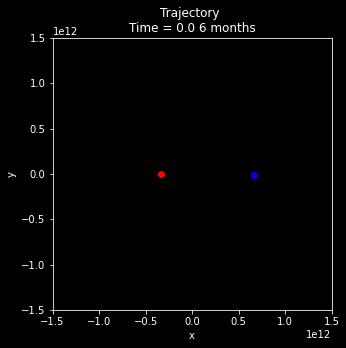

In [349]:
# Plotting the Animation
fig = plt.figure(figsize=(5,5));
ax = plt.axes();
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,frames=nsteps);

line_ani
